In [3]:
# https://cognizant.udemy.com/course/nlp-with-transformers/learn/lecture/26135086#overview

!pip install flair
import flair

#!pip install kaggle

!pip install rouge
from rouge import Rouge

!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

import re
import os
import json
import glob
import tqdm
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download kaggle.json --> Kaggle.com > Account > Create a new API
# import kaggle <!> put the kaggle.json in the required folder
# from kaggle.api.kaggle_api_extended import KaggleApi

import spacy

import torch
import tensorflow as tf

from sklearn.metrics.pairwise import cosine_similarity

# HugginfFace libraries
from transformers import pipeline 
from transformers import AutoModel
from transformers import TFAutoModel
from transformers import BertTokenizer
from transformers import BertForPreTraining
from transformers import AutoTokenizer 
from transformers import BertForQuestionAnswering
from transformers import BertForSequenceClassification

     |████████████████████████████████| 319 kB 4.1 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48 kB 2.7 MB/s 
     |████████████████████████████████| 2.8 MB 38.6 MB/s 
     |████████████████████████████████| 788 kB 27.1 MB/s 
     |████████████████████████████████| 981 kB 47.1 MB/s 
     |████████████████████████████████| 19.7 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 26.9 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 62 kB 847 kB/s 
     |████████████████████████████████| 636 kB 54.9 MB/s 
     |████████████████████████████████| 3.3 MB 57.2 MB/s 
     |████████████████████████████████| 895 kB 68.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=1b0c65f734be85fffa325f0019638dad5634353e3d8f37

In [2]:
pd.set_option('display.max_colwidth', None)

Raw data $\to$ Tokenization

Metrics :

Classification Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / Total True 

When model predicted TRUE class, how often was it right ?


Recall = TP / Actual TRUE 

When the class was actually TRUE, how often did the classifier get it right ?


# Flair

**Flair** is a very simple framework for state-of-the-art Natural Language Processing (NLP).


[read more about Fair](https://github.com/flairNLP/flair)

In [ ]:
# 1. Model

model = flair.models.TextClassifier.load('en-sentiment')

print(f"Type : {type(model)}\n")
#model

In [ ]:
# 2. Tokenization

sentence = flair.data.Sentence('I like you !')

back = sentence.to_tokenized_string()

print(f"{type(sentence)} - {type(back)}")
print(f"{sentence} --> {back}")

<class 'flair.data.Sentence'> - <class 'str'>
Sentence: "I like you !"   [− Tokens: 4] --> I like you !


In [ ]:
# 3. Prediction

model.predict(sentence)

print(f"{sentence}")
print(f"(Label, Value) : {sentence.get_labels()[0]}")
print(f"Score : {sentence.get_labels()[0].score}") # {sentence.labels[0].score}
print(f"Label : {sentence.get_labels()[0].value}") # {sentence.labels[0].value}


Sentence: "I like you !"   [− Tokens: 4  − Sentence-Labels: {'label': [POSITIVE (0.9928)]}]
(Label, Value) : POSITIVE (0.9928)
Score : 0.9928143620491028
Label : POSITIVE


# Transformers with Huggingface and Pytorch

List of all the models that we can access through the Transformers Library

[HuggingFace/models](https://huggingface.co/models)

In [ ]:
# Initialize the tokenizer for BERT models
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Initialize the model for sequence classification
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
# Data 

text = ("Given the recent downturn in stocks especially in tech which is likely to persist as yields keep going up, "
       "I thought it would be prudent to share the risks of investing in ARK ETFs, written up very nicely by "
       "[The Bear Cave](https://thebearcave.substack.com/p/special-edition-will-ark-invest-blow). The risks comes "
       "primarily from ARK's illiquid and very large holdings in small cap companies. ARK is forced to sell its "
       "holdings whenever its liquid ETF gets hit with outflows as is especially the case in market downturns. "
       "This could force very painful liquidations at unfavorable prices and the ensuing crash goes into a "
       "positive feedback loop leading into a death spiral enticing even more outflows and predatory shorts.")


In [ ]:
# Tokenization

"""
max_length : The maximum number of tokens we want to see in each sample, for BERT we almost always use 512 as that is the length of sequences that BERT consumes.
truncation : If our input text contains more tokens than allowed (specified in max_length parameter) then we cut all tokens past the max_length limit.
padding    : If our input text contains less tokens than specified by max_length then we pad the sequence with zeros (0 is the token ID for '[PAD]' - BERTs padding token).
add_special_tokens : Whether or not to add special tokens, when using BERT we always want this to be True unless we are adding them ourselves.
return_tensors     : We specify either 'pt' to return PyTorch tensors, or 'tf' to return TensorFlow tensors.
"""

tokens = tokenizer.encode_plus(text, 
                               max_length=512, 
                               truncation=True, 
                               padding='max_length', 
                               add_special_tokens=True, # BERT has [CLS]=101, [SEP]=102, [UNK]=100, [MASK]=103, [PAD]=0
                               return_tensors='pt') # Pytorch tensors
"""
The output produces 3 tensors in a dictionary format : dict_keys(['input_ids', 'token_type_ids', 'attention_mask']))

'token_type_ids' : We can ignore it as they are not used by BERT.
'input_ids' : are the token ID representations of our input text. 
            Which will be passed into an embedding array, then passed into the BERT layers.
'attention_mask' : Tells the attention layers in BERT which words to calculate attention for (1: value maps to an input ID from the 'input_ids' tensor, 0: value maps to a padding token  )
                 If you look at this tensors you will see that 
"""
type(tokens), tokens.keys()

(transformers.tokenization_utils_base.BatchEncoding,
 dict_keys(['input_ids', 'token_type_ids', 'attention_mask']))

In [ ]:
# Predictions

output = model(**tokens)

print(f"{type(output)}, {output[0]}, {output}") # Not probabilities

"""
The output logits tensor cannot be a set of probabilities because probability values must be within the range 0-1. 
These are infact the final output activations from BERT, to convert these into probabilities we must apply a softmax function. Then, argmax.
"""
output_proba = torch.nn.functional.softmax(output[0], dim=-1)
predictions  = torch.argmax(output_proba)

print(f"{output_proba.shape}")
output_proba, predictions, predictions.item()

<class 'transformers.modeling_outputs.SequenceClassifierOutput'>, tensor([[-1.8200,  2.4484,  0.0216]], grad_fn=<AddmmBackward>), SequenceClassifierOutput(loss=None, logits=tensor([[-1.8200,  2.4484,  0.0216]], grad_fn=<AddmmBackward>), hidden_states=None, attentions=None)
torch.Size([1, 3])


(tensor([[0.0127, 0.9072, 0.0801]], grad_fn=<SoftmaxBackward>), tensor(1), 1)

# Sentiment Model With Tensorflow and Transformers

## Load train data

In [ ]:
api = KaggleApi()

api.authenticate()

In [ ]:
# Download the train & test files
api.competition_download_file('sentiment-analysis-on-movie-reviews',
                             'test.tsv.zip', path='./')

api.competition_download_file('sentiment-analysis-on-movie-reviews',
                             'train.tsv.zip', path='./')

In [ ]:
# Unzip the files

with zipfile.ZipFile('./train.tsv.zip', 'r') as zipref:
    zipref.extractall('./')
    
with zipfile.ZipFile('./test.tsv.zip', 'r') as zipref:
    zipref.extractall('./')
    
glob.glob('./t*.tsv*')

**TSV** stands for Tab Separated Values. 

In [ ]:
# Load data

df_train = pd.read_csv('train.tsv', sep='\t')

print(f"df.shape: {df_train.shape}")
df_train.head(3)

df.shape: (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2


In [ ]:
# Exploring & preprocessing the data 

# Some records are duplicated
print(f"Duplicates row:\n{df_train.groupby('SentenceId').sum().sort_values(by=['SentenceId']).head(3)}\n")

# Dropping duplicates
df_train.drop_duplicates(subset='SentenceId', keep='first', inplace=True)
print(f"Dropping duplicates:\ndf.shape: {df_train.shape}\n")
print(f"{df_train.sort_values(by=['SentenceId'])[['SentenceId', 'Phrase', 'Sentiment']].head(3)}\n")

Duplicates row:
            PhraseId  Sentiment
SentenceId                     
1               2016        125
2               1305         50
3               3465         60

Dropping duplicates:
df.shape: (8529, 4)

    SentenceId  ... Sentiment
0            1  ...         1
63           2  ...         4
81           3  ...         1

[3 rows x 3 columns]



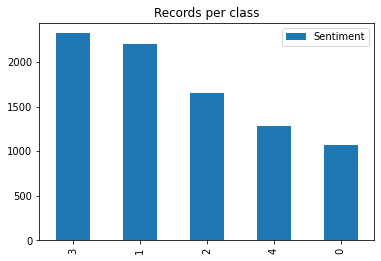

y_original shape: (8529,)
y_HoneHot shape:  (8529, 5)


In [ ]:
# Processing 
df_train['Sentiment'].value_counts().plot(kind='bar', legend=True) 
plt.title(r"Records per class")
plt.show()

## Label -> OnehotEncoding 
labels   = df_train.Sentiment.values
depth    = df_train.Sentiment.nunique()
y_onehot = tf.one_hot(labels, depth)
print(f"y_original shape: {df_train.Sentiment.shape}\ny_HoneHot shape:  {y_onehot.shape}")

In [ ]:
# Initialize the tokenizer for BERT models
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
tokens    = tokenizer(df_train['Phrase'].tolist(), 
                      max_length=512, 
                      truncation=True,
                      padding='max_length', 
                      add_special_tokens=True,
                      return_tensors='tf')

tokens['input_ids'].shape, tokens['attention_mask'].shape, y_onehot.shape

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

(TensorShape([8529, 512]), TensorShape([8529, 512]), TensorShape([8529, 5]))

In [ ]:
# Save 

with open('movie-xids.npy', 'wb') as f:
    np.save(f, tf.cast(tokens['input_ids'], tf.float64))

with open('movie-xmask.npy', 'wb') as f:
    np.save(f, tf.cast(tokens['attention_mask'], tf.float64))

with open('movie-labels.npy', 'wb') as f:
    np.save(f, tf.cast(y_onehot, tf.float64))

In [ ]:
# Upload 

with open('movie-xids.npy', 'rb') as f:
    xids = np.load(f, allow_pickle=True)

with open('movie-xmask.npy', 'rb') as f:
    xmask = np.load(f, allow_pickle=True)

with open('movie-labels.npy', 'rb') as f:
    labels = np.load(f, allow_pickle=True)

print(xids.shape, xmask.shape, labels.shape)

(8529, 512) (8529, 512) (8529, 5)


## Create dataset

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((xids, xmask, labels))
print(dataset.take(1))

"""
Each sample in our dataset is a tuple containing a single : Xids, Xmask, and labels tensor. 
However, when feeding data into our model we need a two-item tuple in the format (\<inputs>, \<outputs>). 
To rearrange the dataset format we can map a function that modifies the format like so:
"""

def map_func(input_ids, masks, labels):
    """
    We convert our three-item tuple into a two-item tuple where the input item is a dictionary
    """
    return {'input_ids': input_ids,
            'attention_mask': masks}, labels

dataset = dataset.map(map_func)
print(dataset.take(1))

<TakeDataset shapes: ((512,), (512,), (5,)), types: (tf.float64, tf.float64, tf.float64)>
<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (5,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>


## Create batches

In [ ]:
batch_size = 16


"""
We need to shuffle our data, and batch it. 
We will take batch sizes of 16 and drop any samples that don't fit evenly into chunks of 16.
"""

dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 5)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

## Split

In [ ]:
# Split the dataset

split = 0.9

# Calculating how many batches must be taken to create 90% training set
size = int((xids.shape[0] / batch_size) * split)
print(f"{size} batches must be taken to create 90% training set")

train_dataset = dataset.take(size)
val_dataset   = dataset.skip(size) # Skip size batches to consider the validation dataset

train_dataset, val_dataset

479 batches must be taken to create 90% training set


(<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 5)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>,
 <SkipDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 5)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>)

In [ ]:
# Save the datasets
tf.data.experimental.save(train_dataset, 'train')
tf.data.experimental.save(val_dataset, 'val')

In [ ]:
train_dataset.element_spec

({'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.float64, name=None),
  'input_ids': TensorSpec(shape=(16, 512), dtype=tf.float64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

# Model

In [ ]:
# We can initialize the Bert model, which we will load as a pretrained model from transformers.

bert = TFAutoModel.from_pretrained('bert-base-cased')

bert.summary()

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


Now we need to define the frame around Bert, we need:

- Two input layers (one for input IDs and one for attention mask).

- A post-bert dropout layer to reduce the likelihood of overfitting and improve generalization.

- Max pooling layer to convert the 3D tensors output by Bert to 2D.

- Final output activations using softmax for outputting categorical probabilities.

In [ ]:
# 1. two input layers, we ensure layer name variables match to dictionary keys in TF dataset
input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int64')
mask      = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int64')

embeddings = bert.bert(input_ids, attention_mask=mask)

print(type(embeddings), len(embeddings))
print(embeddings[0])
print(embeddings[1])

embeddings = embeddings[1] # Access final activations (alread max-pooled) [1]

# convert bert embeddings into 5 output classes
x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(x)

<class 'transformers.modeling_tf_outputs.TFBaseModelOutputWithPooling'> 2
KerasTensor(type_spec=TensorSpec(shape=(None, 512, 768), dtype=tf.float32, name=None), name='bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'bert'")
KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='bert/pooler/dense/Tanh:0', description="created by layer 'bert'")


We can now define our model, specifying input and output layers. Finally, we can freeze the Bert layer because Bert is already highly trained, and contains a huge number of parameters so will take a very long time to train further. 

In [ ]:
# initialize model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# (optional) freeze bert layer
model.layers[2].trainable = False

# print out model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [ ]:
# Our model architecture is now setup, and we can initialize our training parameters like so:

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5, decay=1e-6),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy('accuracy')])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Load our train and validation dataset

load = True 
if load:
    element_spec = ({'input_ids': tf.TensorSpec(shape=(16, 512), dtype=tf.float64, name=None),
                    'attention_mask': tf.TensorSpec(shape=(16, 512), dtype=tf.float64, name=None)},
                    tf.TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

    # load the training and validation sets
    train_dataset = tf.data.experimental.load('train', element_spec=element_spec)
    val_dataset   = tf.data.experimental.load('val', element_spec=element_spec)

    # view the input format
    print(train_dataset.take(1))


<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 5)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>


# Train the model

In [ ]:
model.fit(train_dataset, validation_data=val_dataset, epochs=1)

479/479 [==============================] - 696s 1s/step - loss: 1.5528 - accuracy: 0.2958 - val_loss: 1.5228 - val_accuracy: 0.3333


In [ ]:
model.history.history

{'accuracy': [0.29579854011535645],
 'loss': [1.5527513027191162],
 'val_accuracy': [0.3333333432674408],
 'val_loss': [1.5228455066680908]}

# Save the model

In [ ]:
model.save('sentiment_model')

INFO:tensorflow:Assets written to: sentiment_model/assets


INFO:tensorflow:Assets written to: sentiment_model/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Download the model

In [ ]:
model = tf.keras.models.load_model('sentiment_model')

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

# Load the test data

In [ ]:
# Load data

df_test = pd.read_csv('test.tsv', sep='\t')

## Removing duplicates
df_test.drop_duplicates(subset='SentenceId', keep='first', inplace=True)
print(f"{df_test.shape}")

df_test.head(1)

(3310, 3)


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .


# Evaluation of the model

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=512,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [ ]:
df_test['Sentiment'] = None

In [ ]:
for i, row in tqdm.tqdm(df_test.iterrows()):
    # get token tensors
    tokens = prep_data(row['Phrase'])
    # get probabilities
    probs = model.predict(tokens)
    # find argmax for winning class
    pred = np.argmax(probs)
    # add to dataframe
    df_test.at[i, 'Sentiment'] = pred

df_test.head()

3310it [09:55,  5.56it/s]


,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine effort .,1
15,156076,8546,"Kidman is really the only thing that 's worth watching in Birthday Girl , a film by the stage-trained Jez Butterworth -LRB- Mojo -RRB- that serves as yet another example of the sad decline of British comedies in the post-Full Monty world .",1
93,156154,8547,Once you get into its rhythm ... the movie becomes a heady experience .,3
117,156178,8548,I kept wishing I was watching a documentary about the wartime Navajos and what they accomplished instead of all this specious Hollywood hoo-ha .,1
158,156219,8549,"Kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and depth .",3


# Long Text classification with BERT

To detect the sentiment of a longer pieces of text, we ca follow 2 approaches :

- Using neural text summarization to shorten the text to below 512 tokens.

- Iterating through the text using a window and calculate the average article sentiment.

Knowing that BERT model contains a maximum limit of 512 tokens. 

In [ ]:
txt = """
I would like to get your all  thoughts on the bond yield increase this week.  I am not worried about the market downturn but the sudden increase in yields. On 2/16 the 10 year bonds yields increased by almost  9 percent and on 2/19 the yield increased by almost 5 percent.

Key Points from the CNBC Article:

* **The “taper tantrum” in 2013 was a sudden spike in Treasury yields due to market panic after the Federal Reserve announced that it would begin tapering its quantitative easing program.**
* **Major central banks around the world have cut interest rates to historic lows and launched unprecedented quantities of asset purchases in a bid to shore up the economy throughout the pandemic.**
* **However, the recent rise in yields suggests that some investors are starting to anticipate a tightening of policy sooner than anticipated to accommodate a potential rise in inflation.**

The recent rise in bond yields and U.S. inflation expectations has some investors wary that a repeat of the 2013 “taper tantrum” could be on the horizon.

The benchmark U.S. 10-year Treasury note climbed above 1.3% for the first time since February 2020 earlier this week, while the 30-year bond also hit its highest level for a year. Yields move inversely to bond prices.

Yields tend to rise in lockstep with inflation expectations, which have reached their highest levels in a decade in the U.S., powered by increased prospects of a large fiscal stimulus package, progress on vaccine rollouts and pent-up consumer demand.

The “taper tantrum” in 2013 was a sudden spike in Treasury yields due to market panic after the Federal Reserve announced that it would begin tapering its quantitative easing program.

Major central banks around the world have cut interest rates to historic lows and launched unprecedented quantities of asset purchases in a bid to shore up the economy throughout the pandemic. The Fed and others have maintained supportive tones in recent policy meetings, vowing to keep financial conditions loose as the global economy looks to emerge from the Covid-19 pandemic.

However, the recent rise in yields suggests that some investors are starting to anticipate a tightening of policy sooner than anticipated to accommodate a potential rise in inflation.

With central bank support removed, bonds usually fall in price which sends yields higher. This can also spill over into stock markets as higher interest rates means more debt servicing for firms, causing traders to reassess the investing environment.

“The supportive stance from policymakers will likely remain in place until the vaccines have paved a way to some return to normality,” said Shane Balkham, chief investment officer at Beaufort Investment, in a research note this week.

“However, there will be a risk of another ‘taper tantrum’ similar to the one we witnessed in 2013, and this is our main focus for 2021,” Balkham projected, should policymakers begin to unwind this stimulus.

Long-term bond yields in Japan and Europe followed U.S. Treasurys higher toward the end of the week as bondholders shifted their portfolios.

“The fear is that these assets are priced to perfection when the ECB and Fed might eventually taper,” said Sebastien Galy, senior macro strategist at Nordea Asset Management, in a research note entitled “Little taper tantrum.”

“The odds of tapering are helped in the United States by better retail sales after four months of disappointment and the expectation of large issuance from the $1.9 trillion fiscal package.”

Galy suggested the Fed would likely extend the duration on its asset purchases, moderating the upward momentum in inflation.

“Equity markets have reacted negatively to higher yield as it offers an alternative to the dividend yield and a higher discount to long-term cash flows, making them focus more on medium-term growth such as cyclicals” he said. Cyclicals are stocks whose performance tends to align with economic cycles.

Galy expects this process to be more marked in the second half of the year when economic growth picks up, increasing the potential for tapering.

## Tapering in the U.S., but not Europe

Allianz CEO Oliver Bäte told CNBC on Friday that there was a geographical divergence in how the German insurer is thinking about the prospect of interest rate hikes.

“One is Europe, where we continue to have financial repression, where the ECB continues to buy up to the max in order to minimize spreads between the north and the south — the strong balance sheets and the weak ones — and at some point somebody will have to pay the price for that, but in the short term I don’t see any spike in interest rates,” Bäte said, adding that the situation is different stateside.

“Because of the massive programs that have happened, the stimulus that is happening, the dollar being the world’s reserve currency, there is clearly a trend to stoke inflation and it is going to come. Again, I don’t know when and how, but the interest rates have been steepening and they should be steepening further.”

## Rising yields a ‘normal feature’

However, not all analysts are convinced that the rise in bond yields is material for markets. In a note Friday, Barclays Head of European Equity Strategy Emmanuel Cau suggested that rising bond yields were overdue, as they had been lagging the improving macroeconomic outlook for the second half of 2021, and said they were a “normal feature” of economic recovery.

“With the key drivers of inflation pointing up, the prospect of even more fiscal stimulus in the U.S. and pent up demand propelled by high excess savings, it seems right for bond yields to catch-up with other more advanced reflation trades,” Cau said, adding that central banks remain “firmly on hold” given the balance of risks.

He argued that the steepening yield curve is “typical at the early stages of the cycle,” and that so long as vaccine rollouts are successful, growth continues to tick upward and central banks remain cautious, reflationary moves across asset classes look “justified” and equities should be able to withstand higher rates.

“Of course, after the strong move of the last few weeks, equities could mark a pause as many sectors that have rallied with yields look overbought, like commodities and banks,” Cau said.

“But at this stage, we think rising yields are more a confirmation of the equity bull market than a threat, so dips should continue to be bought.”
"""

In [ ]:
tokenizer_full_text = BertTokenizer.from_pretrained('ProsusAI/finbert')
model_full_text     = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

### 1. Long Text classification with BERT with list

In [ ]:
"""
add_special_tokens=False --> We will add the special tokens : start=[CLS] and end=[SEP] manually later
We will not specify max_length, truncation, or padding parameters (as we do not use any of them here)
We will return by default standard Python lists rather than tensors by not specifying return_tensors 
"""
tokens = tokenizer_full_text.encode_plus(txt, add_special_tokens=False)

type(tokens['input_ids']), len(tokens['input_ids'])

(list, 1345)

In [ ]:
window_size = 510 # + [CLS] + [SEP] = 512 = a maximum limit of 512 tokens fpr a BERT model 

chucks = [{'input_ids': 
           torch.Tensor([ # Format into PyTorch tensors
                        [101] +  #[CLS]
                        tokens['input_ids'][x: x + window_size] + \
                        [102] +  #[SEP]
                        [0] * ((window_size) - len(tokens['input_ids'][x: x + window_size])) # Padding
                        ]).long(),
           'attention_mask': 
            torch.Tensor([ # Format into PyTorch tensors
                         [1] + \
                         tokens['attention_mask'][x: x + window_size] + \
                         [1] + \
                         [0] * ((window_size) - len(tokens['attention_mask'][x: x + window_size])) # Padding
                         ]).int()
           }
          for x in tqdm.tqdm(np.arange(0, len(tokens['attention_mask']), window_size))
          ]


len(chucks), type(chucks[0]) 

100%|██████████| 3/3 [00:00<00:00, 1206.42it/s]


(3, dict)

In [ ]:
probs_list = []

for chuck in tqdm.tqdm(chucks):
    # Make logits prediction
    outputs = model_full_text(**chuck)
    
    # Calculate softmax and append to list
    probs = torch.nn.functional.softmax(outputs[0], dim=-1)
    probs_list.append(probs)

"""
Index 0 : Psositif sentiment 
Index 1 : Negative sentiment
Index 2 : Neutral

"""
probs_list

100%|██████████| 3/3 [00:05<00:00,  1.93s/it]


[tensor([[0.1384, 0.8145, 0.0471]], grad_fn=<SoftmaxBackward>),
 tensor([[0.3757, 0.4670, 0.1574]], grad_fn=<SoftmaxBackward>),
 tensor([[0.7290, 0.2006, 0.0704]], grad_fn=<SoftmaxBackward>)]

In [ ]:
# To convert a list of tensor to tensor: use torch.stack or torch.cat

probs = torch.cat(probs_list)
torch.stack(probs_list).shape, torch.cat(probs_list).shape

(torch.Size([3, 1, 3]), torch.Size([3, 3]))

In [ ]:
# To get the sentiment of the entire text :
# Average the probabilities according to the columns. Then, take the argmax class 
probs.mean(dim=0).argmax().item()

1

# 2. Long Text classification with BERT with tensor

In [ ]:
tokens = tokenizer_full_text.encode_plus(txt, 
                               add_special_tokens=False,
                               return_tensors='pt')

type(tokens['input_ids']), tokens['input_ids'].shape

(torch.Tensor, torch.Size([1, 1345]))

(torch.Size([510]), torch.Size([510]), torch.Size([325]))

In [ ]:
# define target chunksize
chunksize = 512

# split into chunks of 510 tokens, we also convert to list (default is tuple which is immutable)
input_id_chunks = list(tokens['input_ids'][0].split(chunksize - 2))
mask_chunks     = list(tokens['attention_mask'][0].split(chunksize - 2))

print("Before:",input_id_chunks[0].shape, input_id_chunks[1].shape, input_id_chunks[2].shape)

chunksize = 512
for i in range(len(input_id_chunks)):
    # add CLS and SEP tokens to input IDs
    
    pad_len = chunksize - 1 - input_id_chunks[i].shape[0] - 1
   
    input_id_chunks[i] = torch.cat([
        torch.tensor([101]), # [CLS]
        input_id_chunks[i], 
        torch.tensor([102]), # [SEP]
        torch.Tensor([0] * pad_len) # Padding
    ])
    
    # add attention tokens to attention mask
    mask_chunks[i] = torch.cat([
        torch.tensor([1]), # [CLS]
        mask_chunks[i], 
        torch.tensor([1]), # [SEP]
        torch.Tensor([0] * pad_len) # Padding
    ])

for input_id, mask in zip(input_id_chunks, mask_chunks):
    print(input_id.shape, mask.shape)

Before: torch.Size([510]) torch.Size([510]) torch.Size([325])
torch.Size([512]) torch.Size([512])
torch.Size([512]) torch.Size([512])
torch.Size([512]) torch.Size([512])


In [ ]:
input_ids      = torch.stack(input_id_chunks)
attention_mask = torch.stack(mask_chunks)

input_ids.shape, attention_mask.shape

(torch.Size([3, 512]), torch.Size([3, 512]))

In [ ]:
input_dict = {
    'input_ids': input_ids.long(),
    'attention_mask': attention_mask.int()
}
input_dict

{'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32),
 'input_ids': tensor([[  101,  1045,  2052,  ...,  1012,  1523,   102],
         [  101,  1996, 16408,  ...,  2272,  1012,   102],
         [  101,  2153,  1010,  ...,     0,     0,     0]])}

In [ ]:
outputs = model_full_text(**input_dict)
probs = torch.nn.functional.softmax(outputs[0], dim=-1)

probs.mean(dim=0), probs.mean(dim=0).argmax().item()

(tensor([0.4144, 0.4940, 0.0916], grad_fn=<MeanBackward1>), tensor(1))

# Transformers with spacy

In [ ]:
!nvcc --version

In [ ]:
!pip install spacy[transformers,cuda110]

In [ ]:
# Install the large model 
!python -m spacy download en_core_web_lg

In [ ]:
# Install the transformers for Spacy
!pip install -U spacy

!python -m spacy download en_core_web_trf

# Restart the runtime

In [ ]:
import spacy
from spacy import displacy

In [ ]:
trf = spacy.load('en_core_web_trf')

lg = spacy.load('en_core_web_lg')

In [ ]:
# Data

txt1 = "Apple reached an all-time high stock price of 143 dollars this January."

txt2 = """Fastly released its Q1-21 performance on Thursday, after which the stock price dropped a whopping 27%. The company generated revenues of $84.9 million (35% YoY) vs. $85.1 million market consensus. Net loss per share was $0.12 vs. an expected $0.11.

These are not big misses but make the company one of the few high-growth cloud players that underperformed market expectations.

However, the company also lowered its guidance for Q2: Fastly forecasts revenues of $84 - $87 million and a net loss of $0.16 - $0.19 per share, compared to the market consensus of $92 million in revenue and a net loss of $0.08 per share, thereby disappointing investors.

Lastly, Adriel Lares will step down as CFO of the company after 5 years."""

### Test with small sentence

In [ ]:
doc_trf = trf(txt1)

displacy.render(doc_trf, style='ent', jupyter=True, options={'distance': 90})

In [ ]:
doc_lg = lg(txt1)

displacy.render(doc_lg, style='ent', jupyter=True, options={'distance': 90})

### Test with large text

In [ ]:
doc_trf = trf(txt2)

displacy.render(doc_trf, style='ent', jupyter=True, options={'distance': 90})

In [ ]:
doc_lg = lg(txt2)

displacy.render(doc_lg, style='ent', jupyter=True, options={'distance': 90})

# Question answering wit BERT 



[more-details](https://github.com/jamescalam/transformers/blob/main/course/question_answering/00_intro_to_qa.ipynb)


### 1. Open / closed domain (ODQA)
- Asking question without context 
- The model must find out answers from elsewhere
- The elsewhere can be : open book or closed book
- Open when we have access to external ressources (internet or set of book)
- Closed, when the information that the model will provide to us must have been encoded into the model parameters

In ODQA, we have 3 model types:

1. Retriever: 
- The retriever is provided a question
- It uses that question to retrieve information from the external data source

2. Reader:
- The reader is provided a question and context 
- It will identify the answer in the context

3. Generator:
- The generator is provided a question
a. It will provide an answer with a data source
b. With the help of the context of the retriever + question, it will provide an answer

Retriever + Reader + externel data source => Open Domain
Reader => RC
Generator +- Retreiver

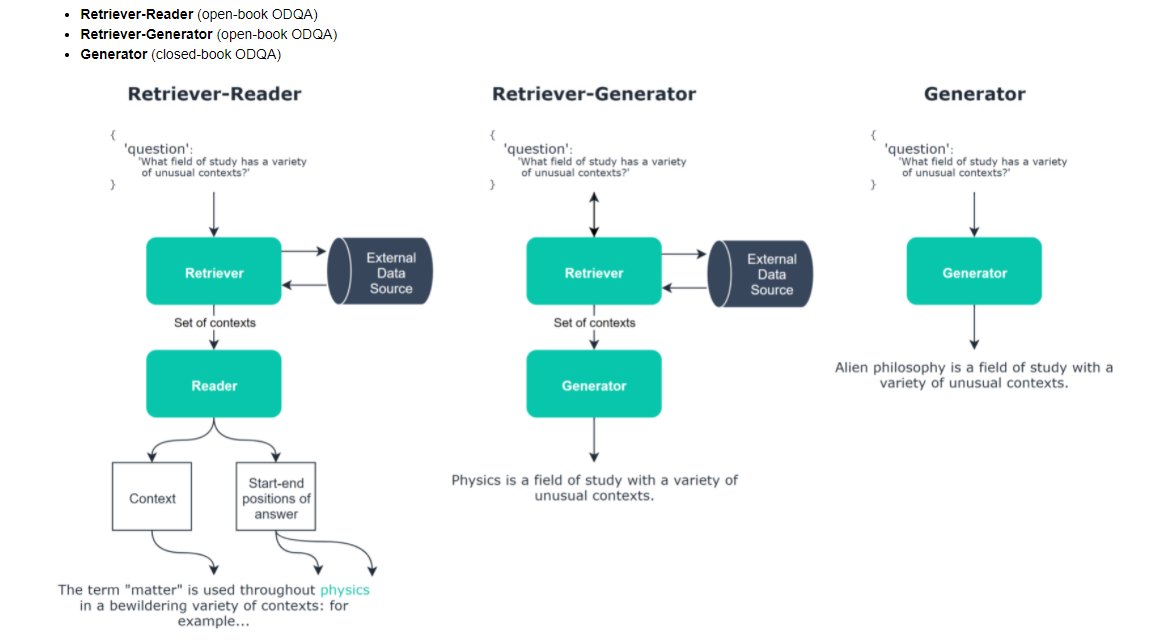


### 2. Reading Comprehension (RC) with BERT
- Extract an answer from a text (context)



# SQuAD 2.0 Dataset

The SQuAD (Stanford Question and Answering Dataset) is a hugely popular dataset containing question and answer pairs scraped from Wikipedia.


## Load data

In [ ]:
url   = 'https://rajpurkar.github.io/SQuAD-explorer/dataset/'
dir   = '/content/squad'
files = ['train-v2.0.json', 'dev-v2.0.json']

!pwd

/content


In [ ]:
if not os.path.exists(dir):
    os.mkdir(dir)

In [ ]:
for file in files:
    res = requests.get(url+file)
      # write to file in chunks
    with open(os.path.join(dir, file), 'wb') as f:
        for chunk in res.iter_content(chunk_size=40):
            f.write(chunk)

In [ ]:
"""
The JSON structure contains a top-level 'data' key which contains a list of groups, 
where each group is a topic, such as Beyonce, Chopin, or Matter. 
We can take a look at the first and last groups respectively.
"""

with open(os.path.join(dir, 'train-v2.0.json'), 'rb') as f:
    squad = json.load(f)

print(type(squad), squad.keys(), type(squad['data']), len(squad['data']))
print(type(squad['data'][0]), squad['data'][0].keys())
print(squad['data'][0]['title'], squad['data'][1]['title'])

<class 'dict'> dict_keys(['version', 'data']) <class 'list'> 442
<class 'dict'> dict_keys(['title', 'paragraphs'])
Beyoncé Frédéric_Chopin


## Parse the data

In [ ]:
# We'll work through parsing this data into a cleaner format 
# We need to create a format that consists of a list of dictionaries 
# where each dictionary contains a single question, answer, and context.

# initialize list where we will place all of our data
new_squad = []

# we need to loop through groups -> paragraphs -> qa_pairs
for group in squad['data']:
    for paragraph in group['paragraphs']:
        # we pull out the context from here
        context = paragraph['context']
        for qa_pair in paragraph['qas']:
            # we pull out the question
            question = qa_pair['question']
            # now the logic to check if we have 'answers' or 'plausible_answers'
            if 'answers' in qa_pair.keys() and len(qa_pair['answers']) > 0:
                answer = qa_pair['answers'][0]['text']
            elif 'plausible_answers' in qa_pair.keys() and len(qa_pair['plausible_answers']) > 0:
                answer = qa_pair['plausible_answers'][0]['text']
            else:
                # this shouldn't happen, but just in case we just set answer = None
                answer = None
            # append dictionary sample to parsed squad
            new_squad.append({
                'question': question,
                'answer': answer,
                'context': context
            })


# Or, we can parse with matching -> page

"""
# initialize list where we will place all of our data
new_squad = []

# we need to loop through groups -> paragraphs -> qa_pairs

for group in squad['data']:
    for paragraph in group['paragraphs']:
        # we pull out the context from here
        context = paragraph['context']
        for qa_pair in paragraph['qas']:
            # we pull out the question
            question = qa_pair['question']
            # now the NEW match-case logic to check if we have 'answers' or 'plausible_answers'
            match qa_pair:
                case {'answers': [{'text': answer}]}:
                    # this will be truthy IF the qa_pair dictionary contains a 'answers' key
                    # which in turn contains a list containing a dictionary with a 'text' key
                    # and any value mapping to this 'text' key is assigned to the answer variable
                    pass  # because the case pattern assigns 'answer' for us, we pass
                case {'plausible_answers': [{'text': answer}]}:
                    # we perform same check but for 'plausible_answers'
                    pass
                case _:
                    # this is our catchall, we will set answer to None
                    answer = None
            # append dictionary sample to parsed squad
            new_squad.append({
                'question': question,
                'answer': answer,
                'context': context
            })
"""

new_squad[0]

{'answer': 'in the late 1990s',
 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".',
 'question': 'When did Beyonce start becoming popular?'}

### Save the parsed dataset

In [ ]:
with open(os.path.join(dir, 'train.json'), 'w') as f:
    json.dump(new_squad, f)

### Download the parsed dataset

In [ ]:
with open(os.path.join(dir, 'train.json'), 'r') as f:
    squad = json.load(f)

# Model

In [ ]:
tokenizer = BertTokenizer.from_pretrained('deepset/bert-base-cased-squad2')
model     = BertForQuestionAnswering.from_pretrained('deepset/bert-base-cased-squad2')

qa = pipeline('question-answering', model=model, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/152 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [ ]:
# we will intialize a list for answers
answers = []

for pair in squad[:5]:
    # pass in our question and context to return an answer
    ans = qa({
        'question': pair['question'],
        'context': pair['context']
    })
    # append predicted answer and real to answers list
    answers.append({
        'predicted': ans['answer'],
        'true': pair['answer']
    })

answers

[{'predicted': 'late 1990s', 'true': 'in the late 1990s'},
 {'predicted': 'singing and dancing', 'true': 'singing and dancing'},
 {'predicted': '(2003),', 'true': '2003'},
 {'predicted': 'Houston, Texas,', 'true': 'Houston, Texas'},
 {'predicted': '1990s', 'true': 'late 1990s'}]

# Metrics for NLP 


https://github.com/jamescalam/transformers/blob/main/course/question_answering/04_rouge.ipynb

## Exact Match Metric
The exact match (EM) metric does what you would expect it to. It returns a boolean value, yes or no, as to whether our predicted text matches to our true text. Advise: you can filter you prediction like remove /d or /W

## Recall

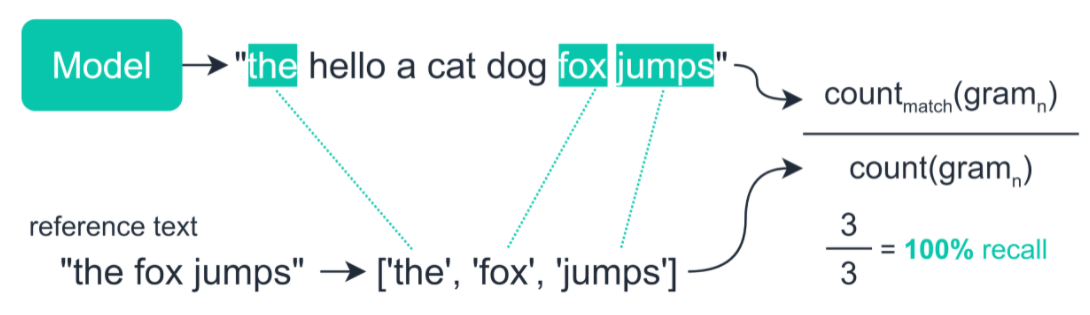

## Precision 

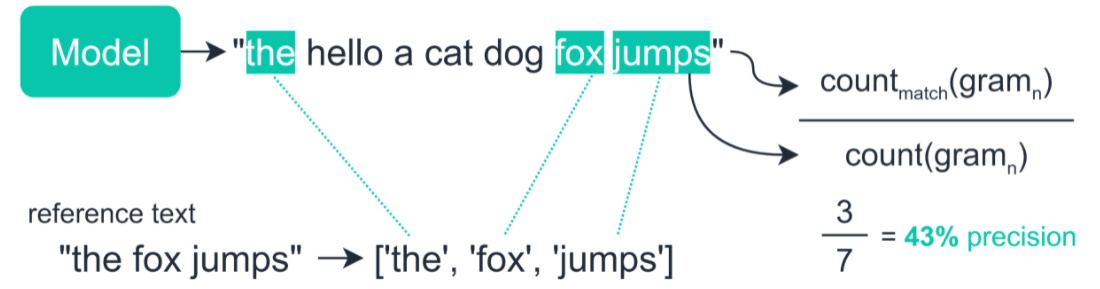

## F1-score

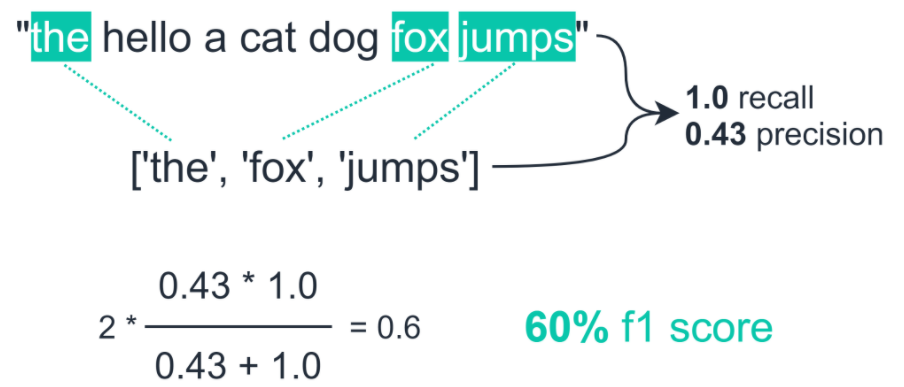

## ROUGE
ROUGE stands for Recall-Oriented Understudy for Gisting Evaluation.

ROUGE is actually a set of metrics, rather than just one. We will cover the main ones that are most likely to be used, starting with ROUGE-N.

### ROUGE-N
It measures the number of matching 'n-grams' between our model predicted answer and a reference (true).

Original: "the quick brown fox jumps over"

Unigrams: ['the', 'quick', 'brown', 'fox', 'jumps', 'over']

Bigrams: ['the quick', 'quick brown', 'brown fox', 'fox jumps', 'jumps over']

Trigrams: ['the quick brown', 'quick brown fox', 'brown fox jumps', 'fox jumps over']

With ROUGE-N, the N represents the n-gram that we are using. For ROUGE-1 we would be measuring the match-rate of unigrams between our model output and reference.

ROUGE-2 and ROUGE-3 would use bigrams and trigrams respectively.

Once we have decided which N to use — we now decide on whether we’d like to calculate the ROUGE recall, precision, or F1 score.

## LCS

The idea here is that a longer shared sequence would indicate more similarity between the two sequences. We can apply our recall and precision calculations just like before — but this time we replace the match with LCS.

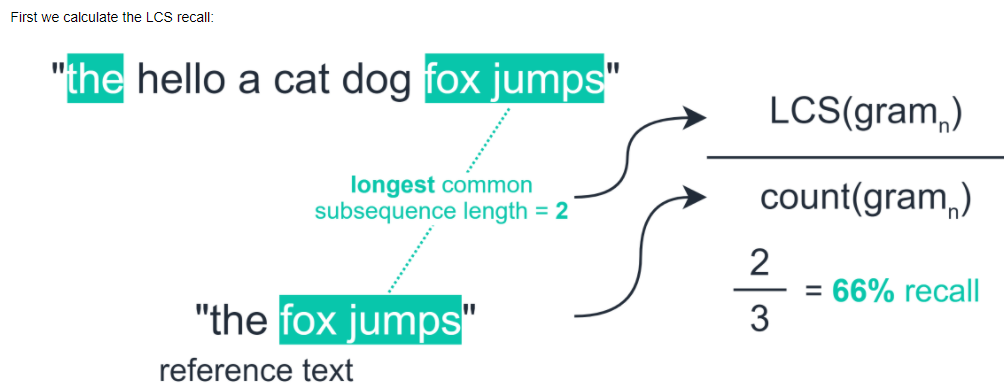

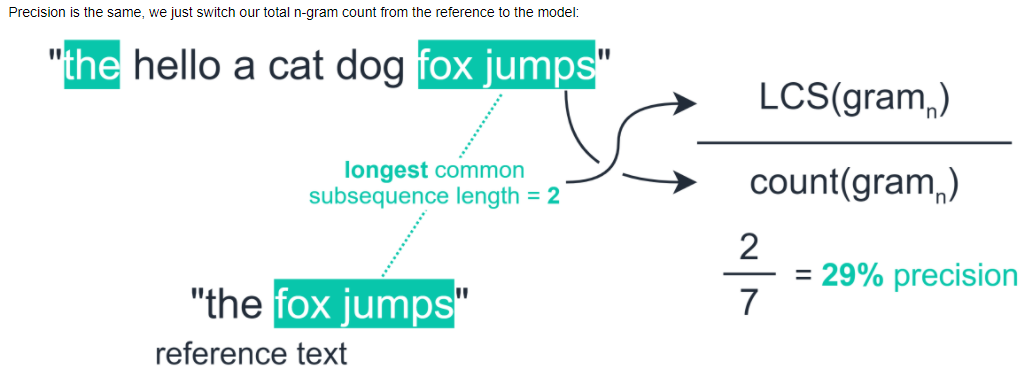

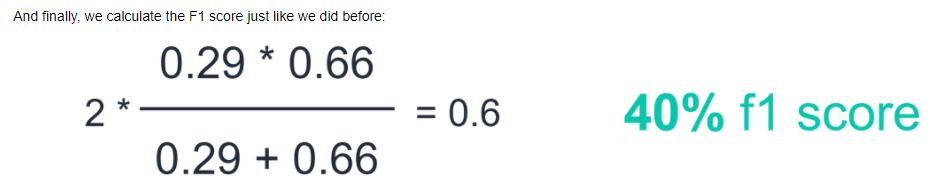

In [ ]:
# initialize the rouge object
rouge = Rouge()
clean = re.compile('(?i)[^0-9a-z ]')

model_out = []
reference = []

In [ ]:
squad[0]

{'answer': 'in the late 1990s',
 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".',
 'question': 'When did Beyonce start becoming popular?'}

In [ ]:
for pair in tqdm.tqdm(squad[:50], leave=True):
    ans = qa({
        'question': pair['question'],
        'context': pair['context']
    })
    # append the prediction and reference to the respective lists
    model_out.append(clean.sub('', ans['answer']))
    reference.append(clean.sub('', pair['answer']))

100%|██████████| 50/50 [01:15<00:00,  1.51s/it]


# Similarity

Compare the similarity between sentences.

We will use cosine similarity and transformers

https://www.youtube.com/playlist?list=PLIUOU7oqGTLhlWpTz4NnuT3FekouIVlqc

In [53]:
sentences = ["Hello how are you ?",
        "Hey! what's up ?", 
        "Celia is the friend of Olivier",
        "Nowdays, Relationships are very complicated"]

In [54]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")
model     = AutoModel.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")

There are 2 ways to do so:
1. Cosine-similarity + Transformers + Pytorch
2. Using sentence transformers (easy)

## Method 1: Cosine-similarity + Transformers + Pytorch

In [61]:
tokens = {'input_ids': [],
          'attention_mask': []}

for sentence in sentences:
    new_tokens = tokenizer.encode_plus(sentence, max_length=128,  # max_len = 128
                     truncation=True, padding='max_length',
                     return_tensors='pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0])
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])
    
tokens['attention_mask'][0].shape, tokens['input_ids'][0].shape

(torch.Size([128]), torch.Size([128]))

In [62]:
tokens['input_ids']      = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

tokens['input_ids'].shape

torch.Size([4, 128])

In [63]:
outputs = model(**tokens)

type(outputs), outputs.keys()

(transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions,
 odict_keys(['last_hidden_state', 'pooler_output']))

In [64]:
# Dense vector embedding 
embeddings = outputs.last_hidden_state

embeddings.shape

torch.Size([4, 128, 768])

In [65]:
# Embedding mask

print(f"mask.shape: {tokens['attention_mask'].shape}\n" + 
      f"unsqueeze: {tokens['attention_mask'].unsqueeze(-1).shape}\n" +
      f"expand: {tokens['attention_mask'].unsqueeze(-1).expand(embeddings.shape).shape}\n" +
      f"type: {type(tokens['attention_mask'].unsqueeze(-1).expand(embeddings.shape))}\n")

attention_mask   = tokens['attention_mask'].unsqueeze(-1).expand(embeddings.shape).float()
masked_embeddings = embeddings * attention_mask

attention_mask.shape, embeddings.shape, masked_embeddings.shape

mask.shape: torch.Size([4, 128])
unsqueeze: torch.Size([4, 128, 1])
expand: torch.Size([4, 128, 768])
type: <class 'torch.Tensor'>



(torch.Size([4, 128, 768]),
 torch.Size([4, 128, 768]),
 torch.Size([4, 128, 768]))

In [67]:
# Mean
# No masked_embadding.mean(axis=1).shape
# We don't want to take 0 as count=1

summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([4, 768])

In [68]:
counts = torch.clamp(mask.sum(1), min=1e-9)
counts.shape, counts[0, 1]

(torch.Size([1, 768]), tensor(10.))

In [83]:
mean_pooled = summed / counts
mean_pooled = mean_pooled.detach().numpy()

mean_pooled.shape

(4, 768)

In [84]:
mean_pooled[0].shape, mean_pooled[1:].shape

((768,), (3, 768))

In [93]:
mean_pooled[0].reshape(1, -1).shape

(1, 768)

In [94]:
# Compute the cosine similarity

cosine_similarity(
    mean_pooled[0].reshape(1, -1),
     mean_pooled[1:]
     )

array([[0.7044642 , 0.58432114, 0.28363293]], dtype=float32)

### Method 2: sentence transformers

In [98]:
model = SentenceTransformer("bert-base-nli-mean-tokens")

In [100]:
embeddings = model.encode(sentences)

embeddings.shape

(4, 768)

In [101]:
# Compute the cosine similarity

cosine_similarity(
    embeddings[0].reshape(1, -1),
    embeddings[1:]
     )

array([[0.7044643 , 0.58432126, 0.28363279]], dtype=float32)

# Pretrained BERT

The pretraining head of BERT, has 2 different heads:
- Next sentence pretrained (NSP) head
    + We have a feed forward network, that outputs 2:  
        * Output 1: Next Sentence prediction
        * Output 2 - Not Next Sentence prediction
- Masked  language modeling (MLM) head 

In [4]:
text = ["After Abraham Lincoln won the November 1860 presidential [MASK] on an "
        "anti-slavery platform, an initial seven slave states declared their "
        "secession from the country to form the Confederacy. War broke out in "
        "April 1861 when secessionist forces [MASK] Fort Sumter in South "
        "Carolina, just over a month after Lincoln's inauguration."]

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model     = BertForPreTraining.from_pretrained('bert-base-uncased')

inputs = tokenizer(text, return_tensors="pt")

inputs.keys(), inputs['input_ids'].shape

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForPreTraining were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(dict_keys(['input_ids', 'token_type_ids', 'attention_mask']),
 torch.Size([1, 62]))

In [5]:
outputs = model(**inputs)

"""
With the BertForPreTraining class, it gives us two outputs:

1. outputs.prediction_logits: Is the output from the MLM head (vocab which maps to a word from the vocab after softmax)
shape=[62,30522] 
62   : Tokens (same as inputs.input_ids.shape) (60 + [CLS] and [SEP])
30522: Vocab size of BERT

2. outputs.seq_relationship_logits is the output from the NSP head (IsNext/NotNext, 0/1, as to whether it is the next sentence or not)
shape=[1, 2]
"""
outputs.keys(), outputs['prediction_logits'].shape, outputs['seq_relationship_logits'].shape

(odict_keys(['prediction_logits', 'seq_relationship_logits']),
 torch.Size([1, 62, 30522]),
 torch.Size([1, 2]))

# Masked Language Modelling

First, let's convert our prediction_logits into token predictions. To do this, we'll need to get a mapping between index values and words from the model vocab, which we can extract from the tokenizer.

In [6]:
token2idx = tokenizer.get_vocab()
# Invert the dictionary to create an index to token dictionary.
idx2token = dict(map(reversed, token2idx.items()))

type(token2idx), len(token2idx), len(idx2token)

(dict, 30522, 30522)

In [7]:
"""
Get the prediction of the next word 
Example: take take a random index followed by softmax to create probability distribution then take the argmax
"""
example = 2
# Tocreate probability distribution 
softmax = torch.nn.functional.softmax(outputs.prediction_logits[0][example], dim=-1)
# Take the argmax
argmax = torch.argmax(softmax)  # get index of the max probability
# O: CLS
idx2token[argmax.item()], text[0][0:30]

('abraham', 'After Abraham Lincoln won the ')

In [8]:
# codes from toturial

softmax = torch.nn.functional.softmax(outputs.prediction_logits[0], dim=0)  # create probability distribution
argmax  = torch.argmax(softmax, dim=1)  # get index of the max probability

for i in argmax:
    print(idx2token[i.item()], end=' ')

##ecin although abraham lincolnshire won 1948 november 1860 presidential primaries on his anti - slavery platform , an initial seven tributary states declared their independence from the country to form ##ici confederacy ##yre war broke out in april 1861 when ##oya ##ist forces occupied fort sum ##mer for south carolina ##trip just over a month before grant ' s inauguration ; ##tson 

In [9]:
# My understanding

softmax = torch.nn.functional.softmax(outputs.prediction_logits[0], dim=-1)  # create probability distribution
argmax  = torch.argmax(softmax, dim=-1)  # get index of the max probability

for i in argmax:
    print(idx2token[i.item()], end=' ')

argmax.shape

# Bert tries his best to predict a suitable word for the masked one in the text
# Mask1 -> election -> Correct
# Mask2 -> attacked  -> incorrect


. after abraham lincoln won the november 1860 presidential election on an anti - slavery platform , an initial seven slave states declared their secession from the country to form the confederacy . war broke out in april 1861 when secession ##ist forces captured fort sum charleston in south carolina , just over a month after lincoln ' s inauguration . s 

torch.Size([62])

In [10]:
text

["After Abraham Lincoln won the November 1860 presidential [MASK] on an anti-slavery platform, an initial seven slave states declared their secession from the country to form the Confederacy. War broke out in April 1861 when secessionist forces [MASK] Fort Sumter in South Carolina, just over a month after Lincoln's inauguration."]

# Next Sentence Prediction

Next sentence prediction is slightly different. First, we need to define the two sequences, which we must split using a [SEP] token and differentiate using the token_type_ids tensor.

In [11]:
text = ("After Abraham Lincoln won the November 1860 presidential [MASK] on an "
        "anti-slavery platform, an initial seven slave states declared their "
        "secession from the country to form the Confederacy.")
text2 = ("War broke out in April 1861 when secessionist forces [MASK] Fort "
         "Sumter in South Carolina, just over a month after Lincoln's "
         "inauguration.")

In [13]:
inputs = tokenizer(text, text2, return_tensors="pt")

"""
We have 0 values for sentence A, followed by 1 values for sentence B. 
Additionally, in input_ids, we have the value 102 (the SEPerator token) seperating both tokens.

Both of these are done automatically by the tokenizer, and BERT relies on this when we work with multiple sequences, as we do for NSP.
"""
inputs

{'input_ids': tensor([[  101,  2044,  8181,  5367,  2180,  1996,  2281,  7313,  4883,   103,
          2006,  2019,  3424,  1011,  8864,  4132,  1010,  2019,  3988,  2698,
          6658,  2163,  4161,  2037, 22965,  2013,  1996,  2406,  2000,  2433,
          1996, 18179,  1012,   102,  2162,  3631,  2041,  1999,  2258,  6863,
          2043, 22965,  2923,  2749,   103,  3481,  7680,  3334,  1999,  2148,
          3792,  1010,  2074,  2058,  1037,  3204,  2044,  5367,  1005,  1055,
         17331,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [14]:
outputs = model(**inputs)

outputs.seq_relationship_logits

tensor([[ 6.0843, -5.6813]], grad_fn=<AddmmBackward>)

In [16]:
# Get index of the max activation
argmax = torch.argmax(outputs.seq_relationship_logits).item()

"""
Index 0: represents BERTs IsNext class, meaning that sentence B is the next sentence after A. 
Index 1: represents the NotNext class, meaning sentence B is not the next sentence after B. 
"""
'NotNext' if argmax else 'IsNext'

'IsNext'